In [45]:
import numpy as np;
import matplotlib;
import matplotlib.pyplot as plt;
import sklearn as skl;
from sklearn.linear_model import LinearRegression;

In [46]:
import csv
import datetime
from dateutil.relativedelta import *

date = []
temp = []

with open('../../data/data.csv') as data_file:
    csv_reader = csv.reader(data_file, delimiter=',')
    for row in csv_reader:
        date.append(row[0])
        temp.append(float(row[1]))

data_points_count = 12 * 50
x = np.array(list(range(0, data_points_count))).reshape((-1, 1));
y = np.array(temp[-1 * data_points_count:]);

formatted_dates = [datetime.datetime.strptime(d, '%Y%m') for d in date[-1 * data_points_count:]]


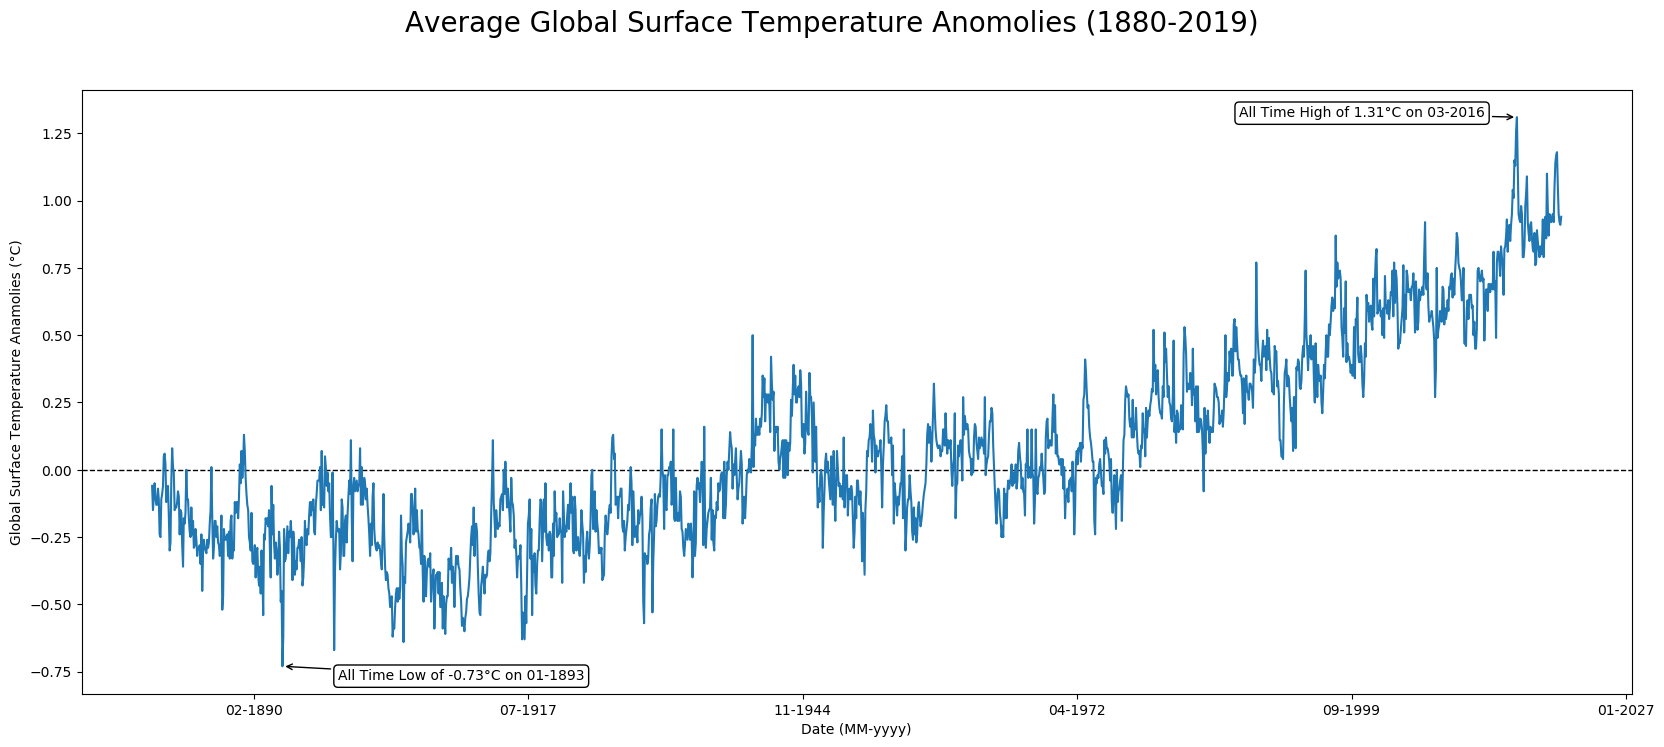

In [47]:
all_formatted_dates = [datetime.datetime.strptime(d, '%Y%m') for d in date]
plt_dates = matplotlib.dates.date2num(all_formatted_dates)
temp_max_index = temp.index(max(temp[::-1])) # Get highest temps, current temps take precidence if there are duplicates.
temp_min_index = temp.index(min(temp[::-1])) # Get lowest temps, current temps take precidence if there are duplicates.
init_fig = plt.figure(figsize=(20, 8), dpi=100, facecolor='w', edgecolor='k')
init_fig.suptitle('Average Global Surface Temperature Anomolies (1880-2019)', fontsize=20)
init_SubPlot = init_fig.add_subplot(1,1,1)
init_SubPlot.axhline(0, color='black', lw=1, linestyle='--')
formatted_x_dates = matplotlib.dates.DateFormatter('%m-%Y')
init_SubPlot.xaxis.set_major_formatter(formatted_x_dates)
init_SubPlot.plot(plt_dates, temp)
init_SubPlot.set_xlabel('Date (MM-yyyy)')
init_SubPlot.set_ylabel('Global Surface Temperature Anamolies (°C)')
init_SubPlot.annotate(f'All Time High of {temp[temp_max_index]}°C on {all_formatted_dates[temp_max_index].strftime("%m-%Y")}', xy=(plt_dates[temp_max_index],temp[temp_max_index]), xytext=(-200, 0), textcoords="offset points", bbox=dict(boxstyle="round", fc="w"), arrowprops=dict(arrowstyle="->"))
init_SubPlot.annotate(f'All Time Low of {temp[temp_min_index]}°C on {all_formatted_dates[temp_min_index].strftime("%m-%Y")}', xy=(plt_dates[temp_min_index],temp[temp_min_index]), xytext=(40, -10), textcoords="offset points", bbox=dict(boxstyle="round", fc="w"), arrowprops=dict(arrowstyle="->"))
plt.show()

In [48]:
model = LinearRegression();
model.fit(x, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

r_sq = model.score(x, y)
print(r_sq)

intercept: -0.010414198557959164
slope: [0.00151563]
0.7982243409547739


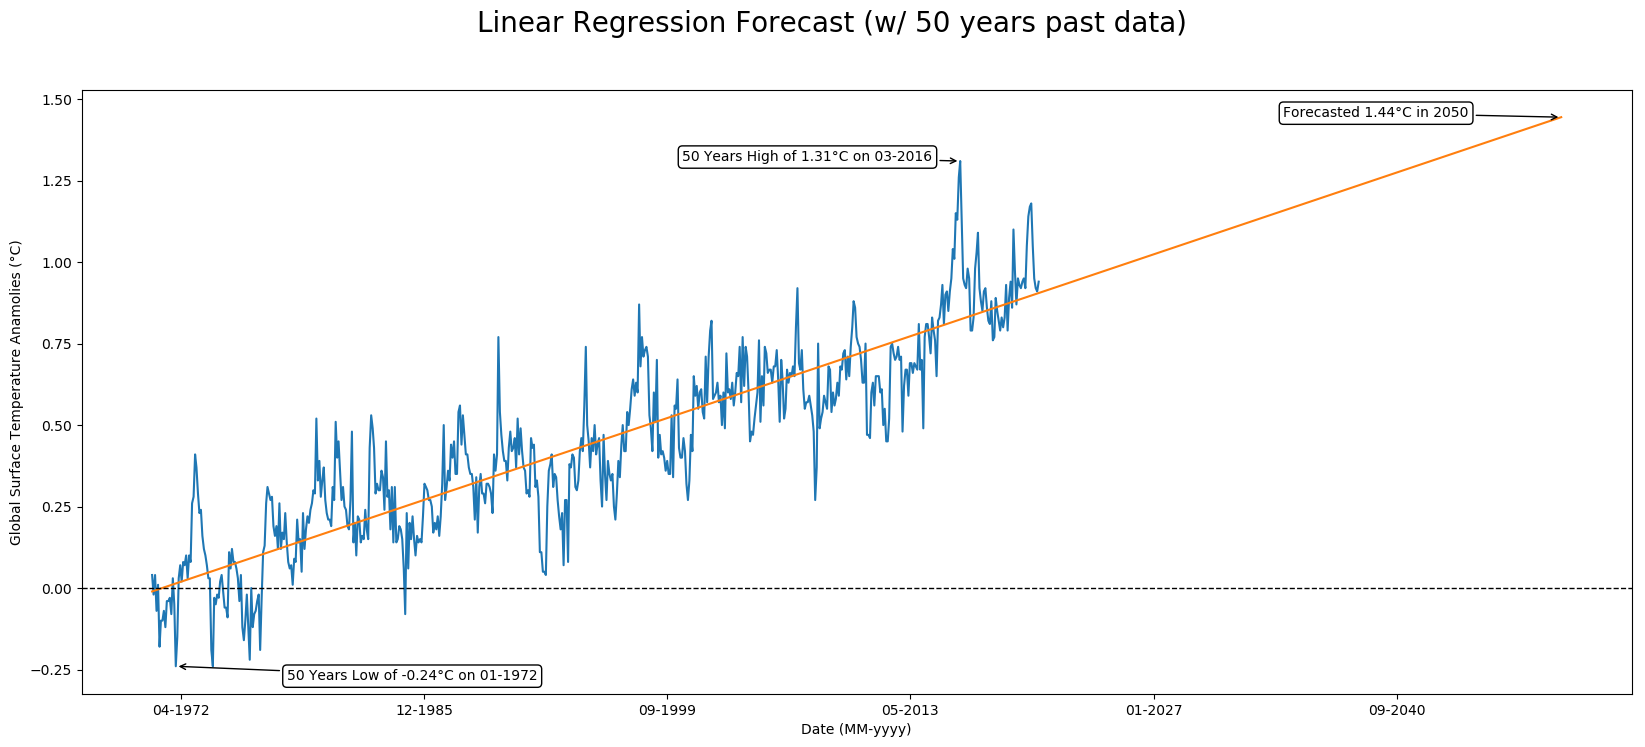

In [49]:
x_dates = matplotlib.dates.date2num(formatted_dates)
formatted_x_dates = matplotlib.dates.DateFormatter('%m-%Y')
fig = plt.figure(figsize=(20, 8), dpi=100, facecolor='w', edgecolor='k')
fig.suptitle(f'Linear Regression Forecast (w/ {int(data_points_count/12)} years past data)', fontsize=20)
subPlot = fig.add_subplot(1,1,1)
subPlot.xaxis.set_major_formatter(formatted_x_dates)
subPlot.plot(x_dates, y)
subPlot.set_xlabel('Date (MM-yyyy)')
subPlot.set_ylabel('Global Surface Temperature Anamolies (°C)')

fifty_year_low_index = np.argmin(y)
fifty_year_high_index = np.argmax(y)

x2 = matplotlib.dates.date2num(datetime.datetime.strptime('01-2050', '%m-%Y'))
y2 = model.coef_ * (data_points_count + 30 * 12) + model.intercept_
subPlot.plot([x_dates[0], x2], [model.intercept_, y2])
subPlot.annotate(f'Forecasted {round(y2[-1],2)}°C in 2050', xy=(x2,y2), xytext=(-200,0), textcoords="offset points", bbox=dict(boxstyle="round", fc="w"), arrowprops=dict(arrowstyle="->"))
subPlot.axhline(0, color='black', lw=1, linestyle='--')
subPlot.annotate(f'50 Years High of {y[fifty_year_high_index]}°C on {formatted_dates[fifty_year_high_index].strftime("%m-%Y")}', xy=(x_dates[fifty_year_high_index],y[fifty_year_high_index]), xytext=(-200, 0), textcoords="offset points", bbox=dict(boxstyle="round", fc="w"), arrowprops=dict(arrowstyle="->"))
subPlot.annotate(f'50 Years Low of {y[fifty_year_low_index]}°C on {formatted_dates[fifty_year_low_index].strftime("%m-%Y")}', xy=(x_dates[fifty_year_low_index],y[fifty_year_low_index]), xytext=(80, -10), textcoords="offset points", bbox=dict(boxstyle="round", fc="w"), arrowprops=dict(arrowstyle="->"))
plt.show()